In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

pd.options.display.float_format = '{:.3f}'.format

In [3]:
ROOT_DIR = '..'
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

import faai

In [4]:
def lego_brick():
    
    L = 31.8
    W = 15.8

    corners = np.array([[0, 0], [L, 0], [L, W], [0, W]])
    
    return corners.T


def viz_rectangle(corners, **fill_kwargs):    
    plt.fill(corners[0, :], corners[1, :], **fill_kwargs)
    
    
def generate_poses(n, xrange, yrange, random_seed=None):
    
    xmin, xmax = xrange
    ymin, ymax = yrange
    
    if random_seed is not None:
        np.random.seed(random_seed)
    
    gen = []
    
    for i in range(n):
    
        x = np.random.random() * (xmax - xmin) + xmin
        y = np.random.random() * (ymax - ymin) + ymin
        
        theta = np.random.random() * (2 * np.pi)
        
        triple = (x, y, theta)
        gen.append(triple)
        
    return pd.DataFrame(gen, columns=['x', 'y', 'theta'])

In [5]:
brick = lego_brick()
brick_h = faai.e2h(brick)

print(brick)
print()
print(brick_h)

[[ 0.  31.8 31.8  0. ]
 [ 0.   0.  15.8 15.8]]

[[ 0.  31.8 31.8  0. ]
 [ 0.   0.  15.8 15.8]
 [ 1.   1.   1.   1. ]]


In [6]:
faai.h2e(brick_h)

array([[ 0. , 31.8, 31.8,  0. ],
       [ 0. ,  0. , 15.8, 15.8]])

In [7]:
poses_df = generate_poses(10, (30, 350), (30, 210), random_seed=700)

poses_df

,x,y,theta
0,80.095,105.037,0.420
1,306.930,84.413,4.657
2,161.333,92.124,6.097
3,302.814,133.623,4.683
4,249.243,97.415,1.160
5,120.529,166.940,3.841
6,205.165,157.944,3.681
7,340.886,200.224,3.246
8,240.637,173.087,2.559
9,276.251,43.807,4.105


In [8]:
poses_df_deg = poses_df.copy()
poses_df_deg['theta'] = poses_df_deg['theta'].apply(np.rad2deg)

poses_df_deg

,x,y,theta
0,80.095,105.037,24.050
1,306.930,84.413,266.852
2,161.333,92.124,349.339
3,302.814,133.623,268.309
4,249.243,97.415,66.468
5,120.529,166.940,220.060
6,205.165,157.944,210.888
7,340.886,200.224,186.000
8,240.637,173.087,146.595
9,276.251,43.807,235.180


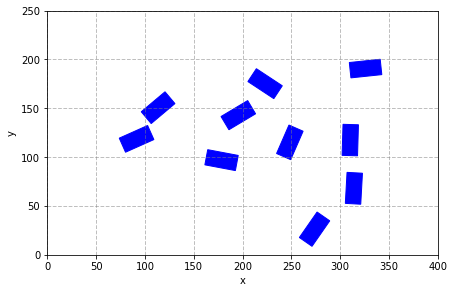

In [9]:
brick = lego_brick()
brick_h = faai.e2h(brick)

plt.figure(figsize=(7, 7))

plt.axis('equal')
plt.gca().set_adjustable('box')
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.xlim((0, 400))
plt.ylim((0, 250))

for _, row in poses_df.iterrows():
    
    x, y, theta = row
    
    T = faai.se2([x, y], theta)

    brick_transformed_h = np.dot(T, brick_h)
    brick_transformed = faai.h2e(brick_transformed_h)
    viz_rectangle(brick_transformed, color='blue')

plt.xlabel('x')
plt.ylabel('y')

plt.show()